In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [5]:
from datetime import datetime, timedelta

tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# yearly stock price data timeframe
end = datetime(2024, 12, 31)
start = end - timedelta(days=365)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


# 1. What was Change in the price stock over the year  

## Descriptive Statistics

`.describe` generate descriptive statistics. Provides a quick overview of the central tendency, dispersion, and shape of the dataset's distribution, excluding `NaN` (missing) values. 

In [4]:
AMZN.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AMZN,AMZN,AMZN,AMZN,AMZN,AMZN
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,184.490199,184.490199,186.329681,182.431115,184.450717,4.104755e+07
std,17.322854,17.322854,17.473920,17.143137,17.320492,1.625681e+07
min,144.570007,144.570007,146.589996,144.050003,144.690002,1.500750e+07
25%,175.370003,175.370003,177.544998,173.709999,175.619995,3.108820e+07
50%,183.320007,183.320007,185.100006,181.490005,183.199997,3.755210e+07
75%,189.599998,189.599998,191.490005,187.425003,189.909996,4.467150e+07
max,232.929993,232.929993,233.000000,228.009995,232.389999,1.414484e+08


## Closing Price

The closing price is the last price at which the stock is traded during the regular trading day. A stock’s closing price is the standard benchmark used by investors to track its performance over time.

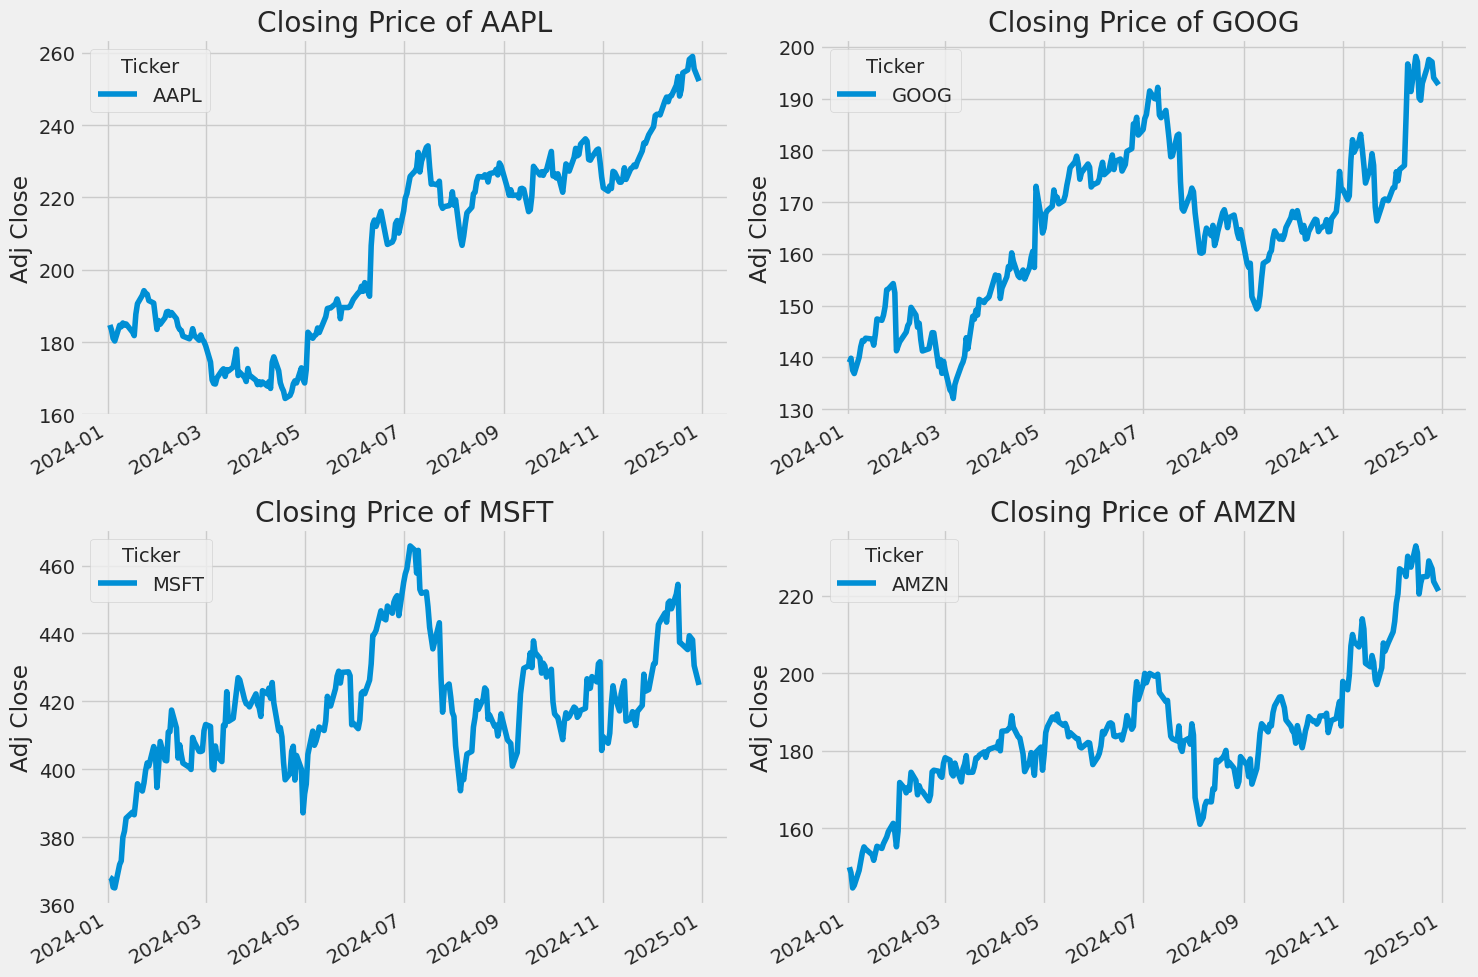

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))  # 2x2 grid
for ax, company, tech_name in zip(axes.flat, company_list, tech_list[:4]):  # Flatten grid
    company['Adj Close'].plot(ax=ax)
    ax.set_ylabel('Adj Close')
    ax.set_xlabel(None)
    ax.set_title(f"Closing Price of {tech_name}")

plt.tight_layout()


## Volume of sales

total number of shares that are bought or sold (traded) within a specific period of time 

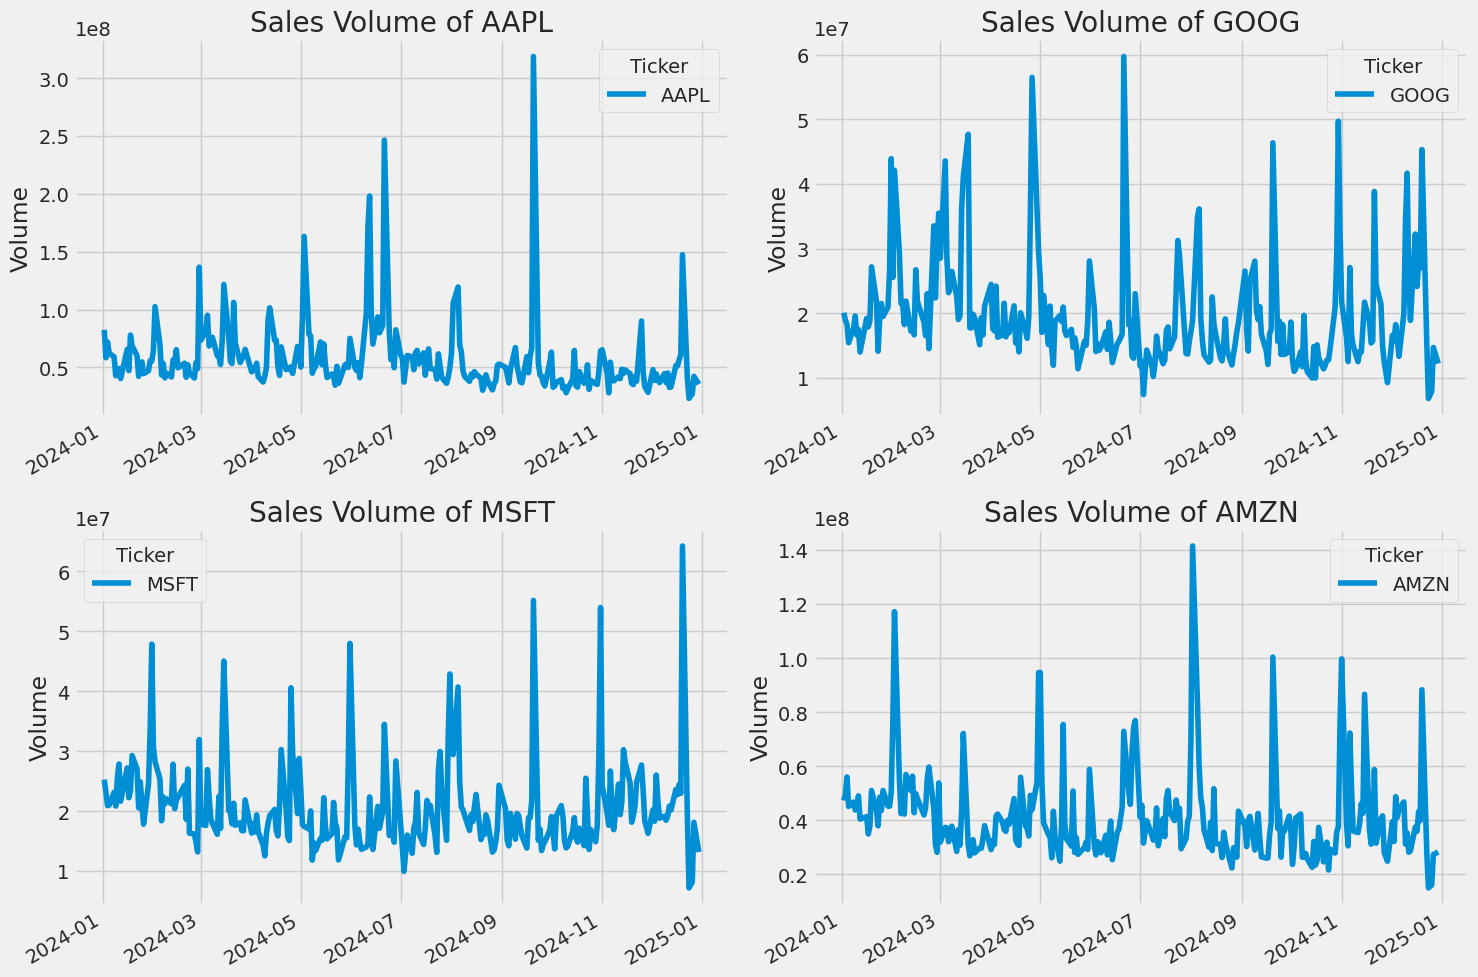

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))  # 2x2 grid
for ax, company, tech_name in zip(axes.flat, company_list, tech_list):  # Flatten grid
    company['Volume'].plot(ax=ax)
    ax.set_ylabel('Volume')
    ax.set_xlabel(None)
    ax.set_title(f"Sales Volume of {tech_name}")

plt.tight_layout()

# 2. What is the moving average of each stock

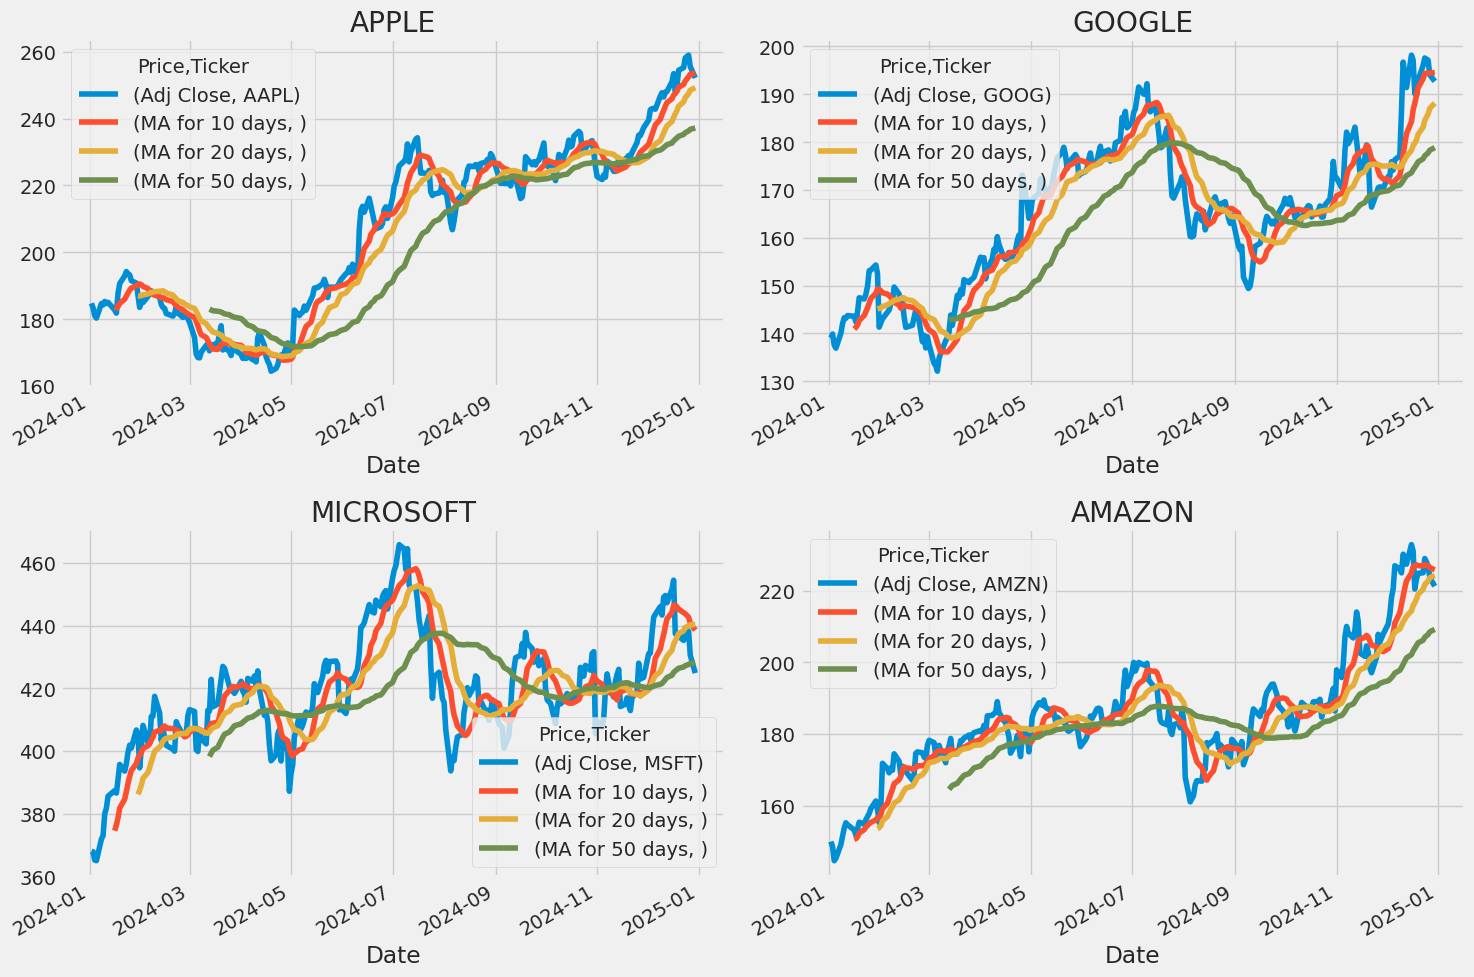

In [7]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()


fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

from the graph we can see that using 10 and 20 days moving average we can still capture trends without capturing a lot of noise

# 3. What was the daily return of stock on Average

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the Apple stock.

In [8]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2024-01-02 to 2024-12-30
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Adj Close, AAPL)   251 non-null    float64
 1   (Close, AAPL)       251 non-null    float64
 2   (High, AAPL)        251 non-null    float64
 3   (Low, AAPL)         251 non-null    float64
 4   (Open, AAPL)        251 non-null    float64
 5   (Volume, AAPL)      251 non-null    int64  
 6   (company_name, )    251 non-null    object 
 7   (MA for 10 days, )  242 non-null    float64
 8   (MA for 20 days, )  232 non-null    float64
 9   (MA for 50 days, )  202 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 21.6+ KB


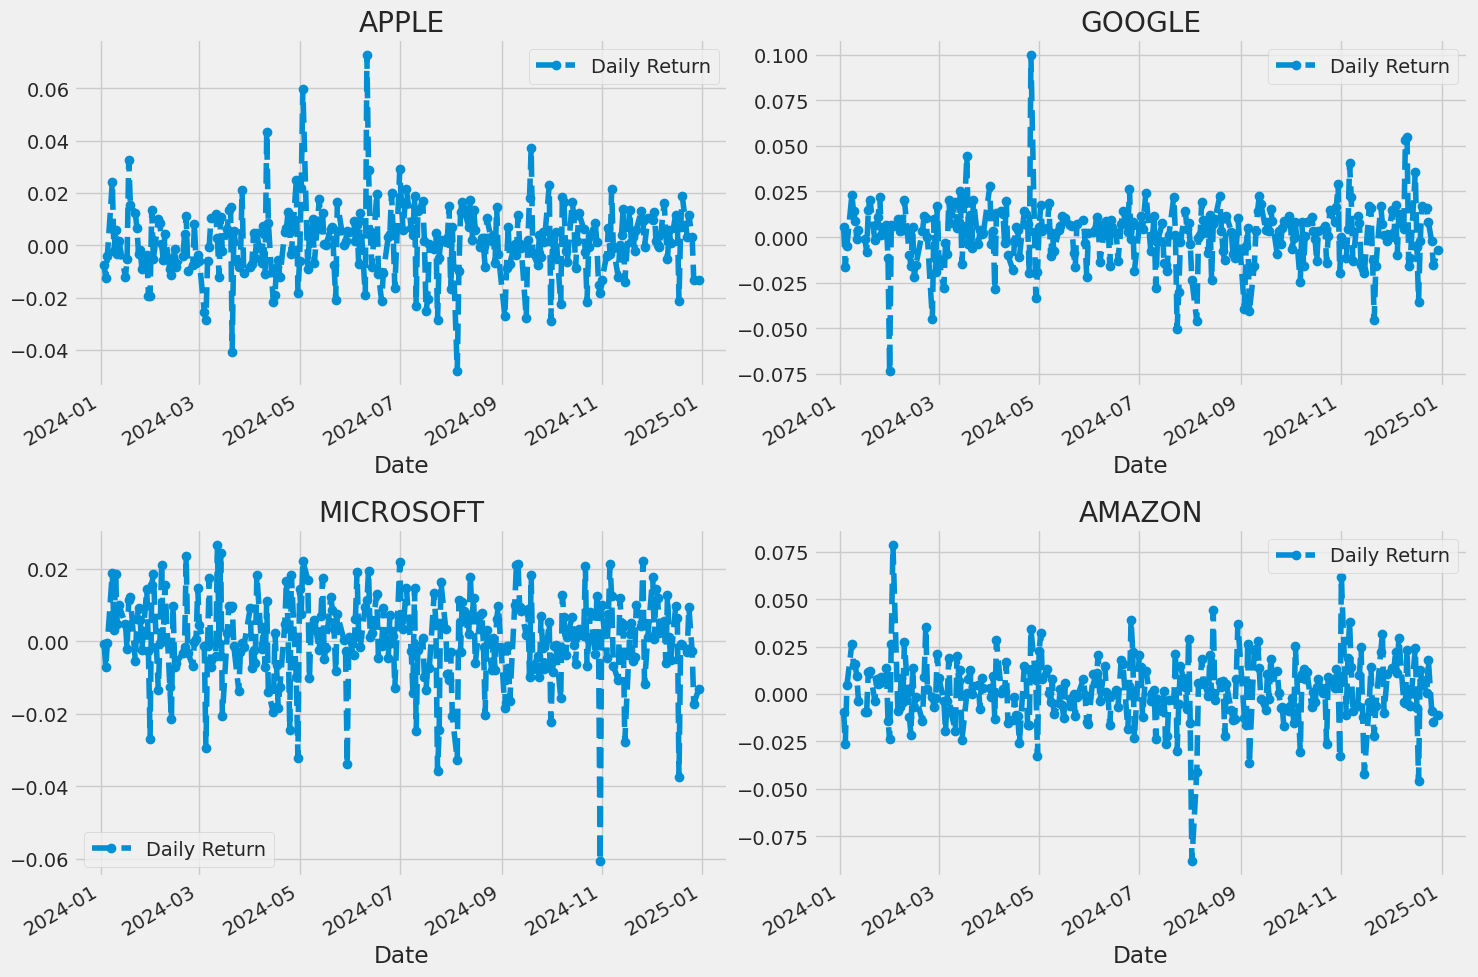

In [9]:
# pct_change to find daily stock value change
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

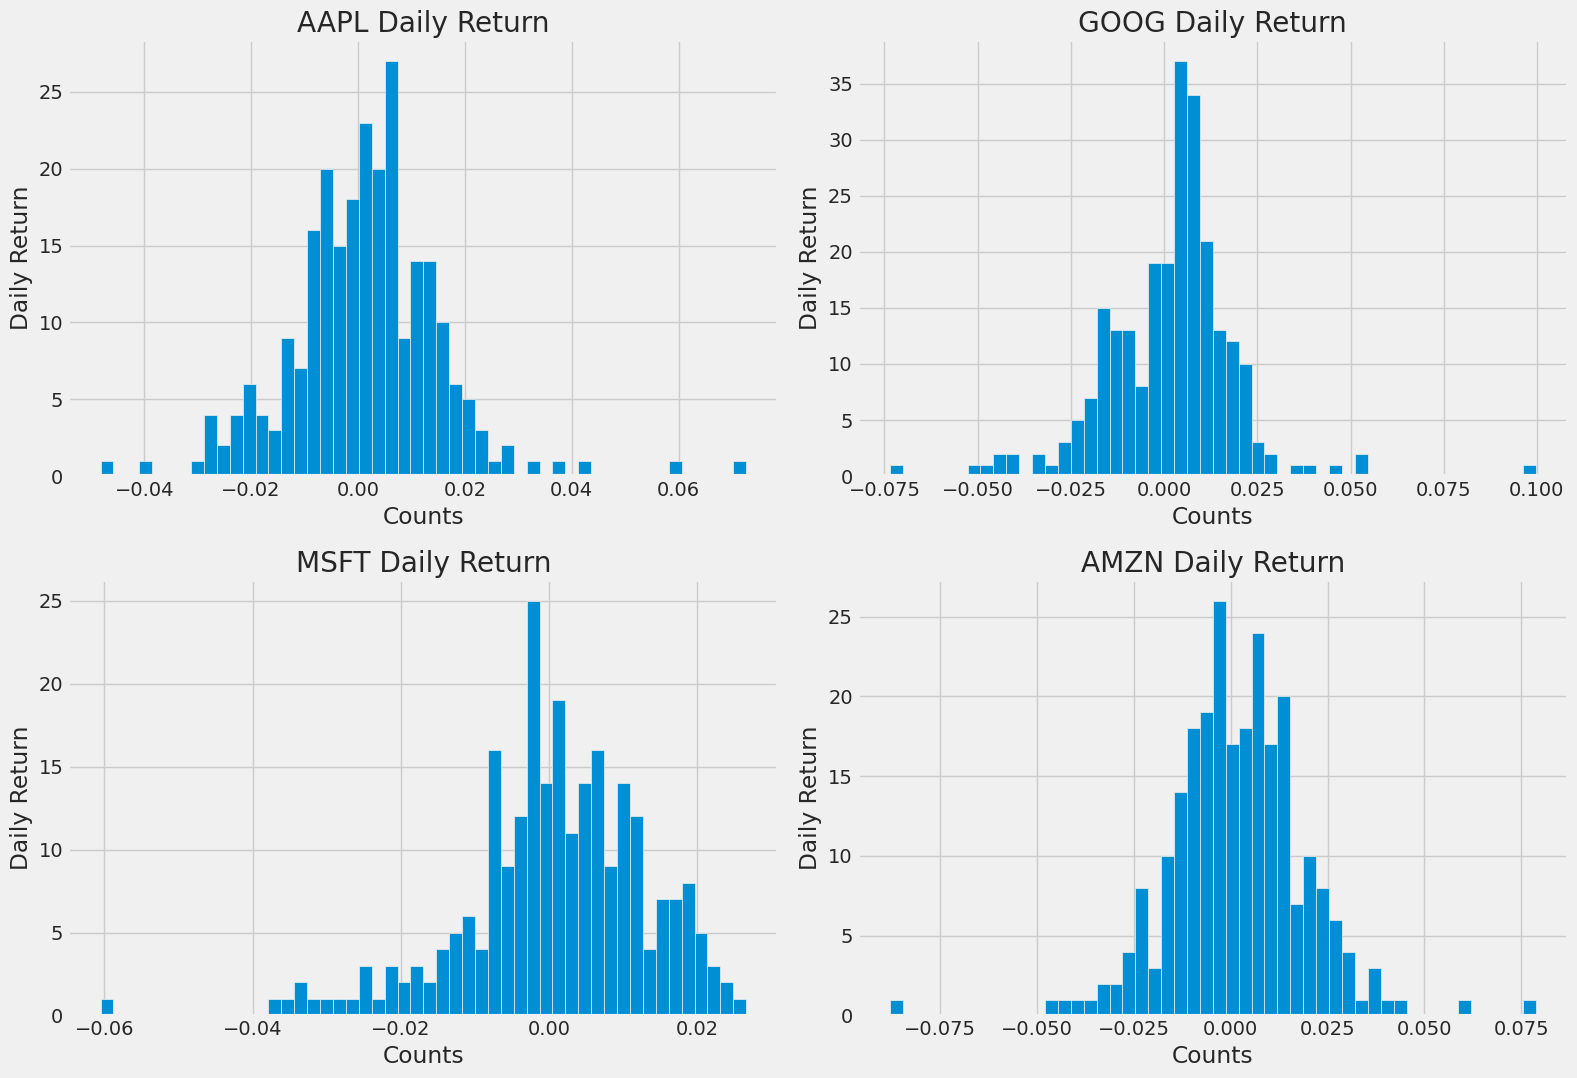

In [10]:
fig, axes = plt.subplots(2,2, figsize=(16,11))
for ax, company, tech_name in zip(axes.flat, company_list, tech_list):
    company['Daily Return'].hist(bins=50, ax=ax)
    ax.set_xlabel('Counts')
    ax.set_ylabel('Daily Return')
    ax.set_title(f'{tech_name} Daily Return')
    
plt.tight_layout()

# 4. What was the correlation between different stock closing prices

Correlation is a statistic that measures the degree to which two variables move in relation to each other which has a value that must fall between -1.0 and +1.0. Correlation measures association, but doesn’t show if x causes y or vice versa — or if the association is caused by a third factor[1].

Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [11]:
closing_df = yf.download(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%***********************]  4 of 4 completed
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2024-01-02,NaN,NaN,NaN,NaN
2024-01-03,-0.007488,-0.009738,0.005732,-0.000728
2024-01-04,-0.012700,-0.026268,-0.016529,-0.007178
2024-01-05,-0.004013,0.004634,-0.004709,-0.000516
2024-01-08,0.024175,0.026577,0.022855,0.018872


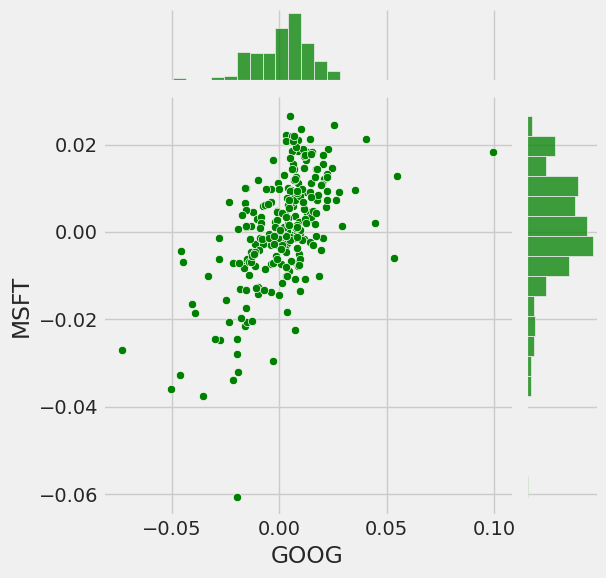

In [12]:
#compare daily returns from of google microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter', color='green')

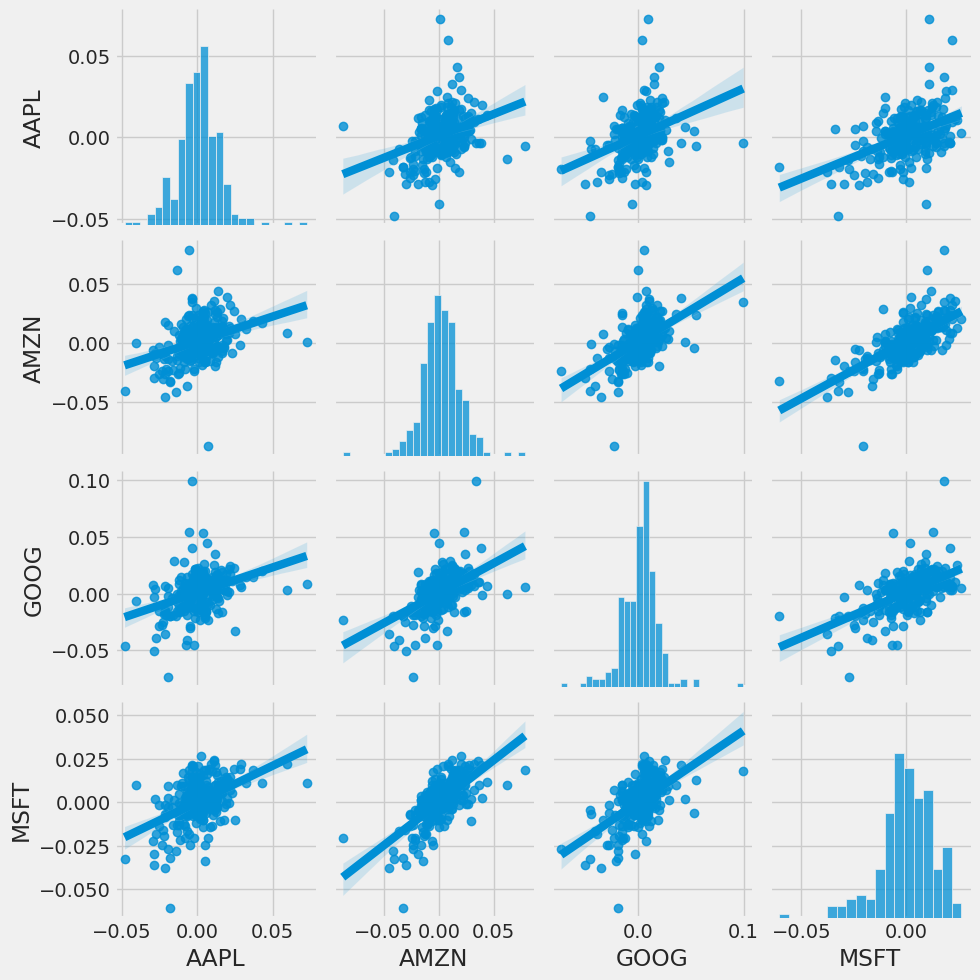

In [13]:
sns.pairplot(data=tech_rets, kind='reg')

The scatter plots are tightly clustered around the regression line, meaning the returns of these stocks are positively correlated.
This suggests that when one stock increases, the others tend to increase as well.


While the simplicity of just calling sns.pairplot() is fantastic we can also use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this resu

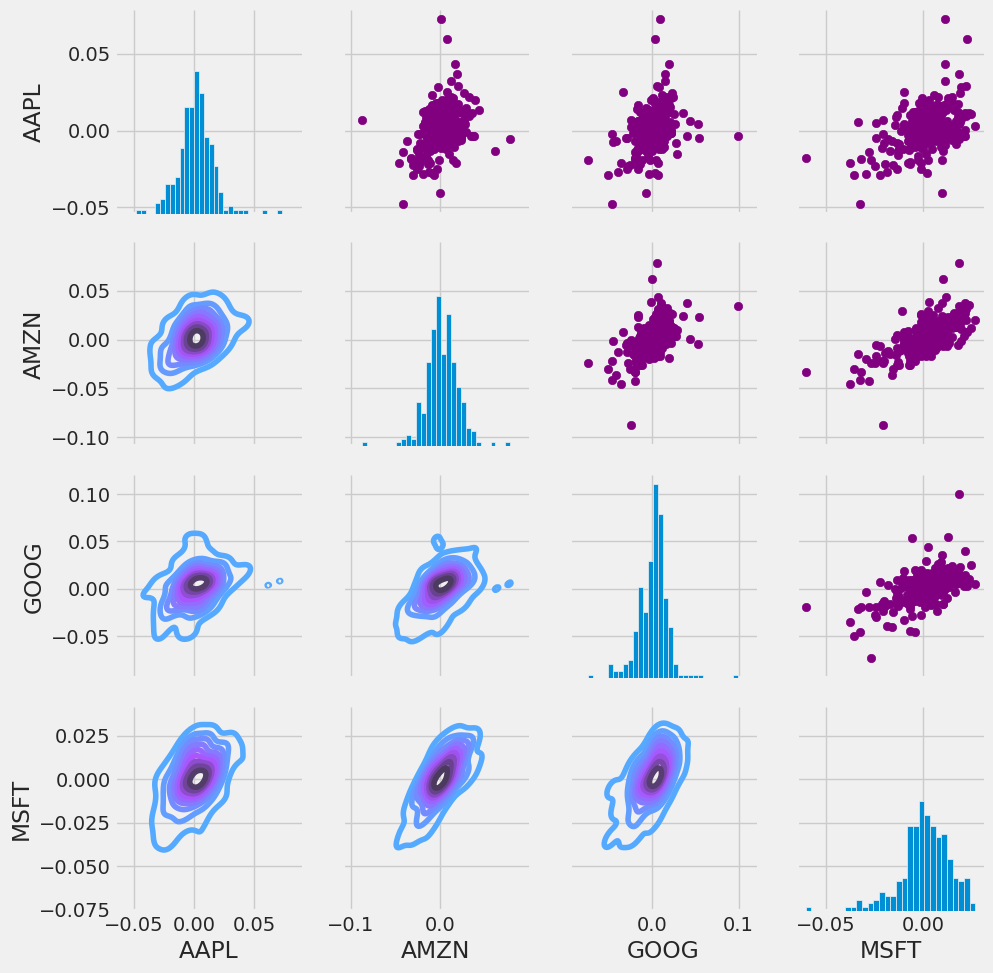

In [14]:
tech_rets_cleaned = tech_rets.replace([np.inf, -np.inf], np.nan).dropna()

# Now use PairGrid
return_fig = sns.PairGrid(tech_rets_cleaned)
return_fig.map_upper(plt.scatter, color="Purple")
return_fig.map_lower(sns.kdeplot, cmap="cool_d")
return_fig.map_diag(plt.hist, bins=30)



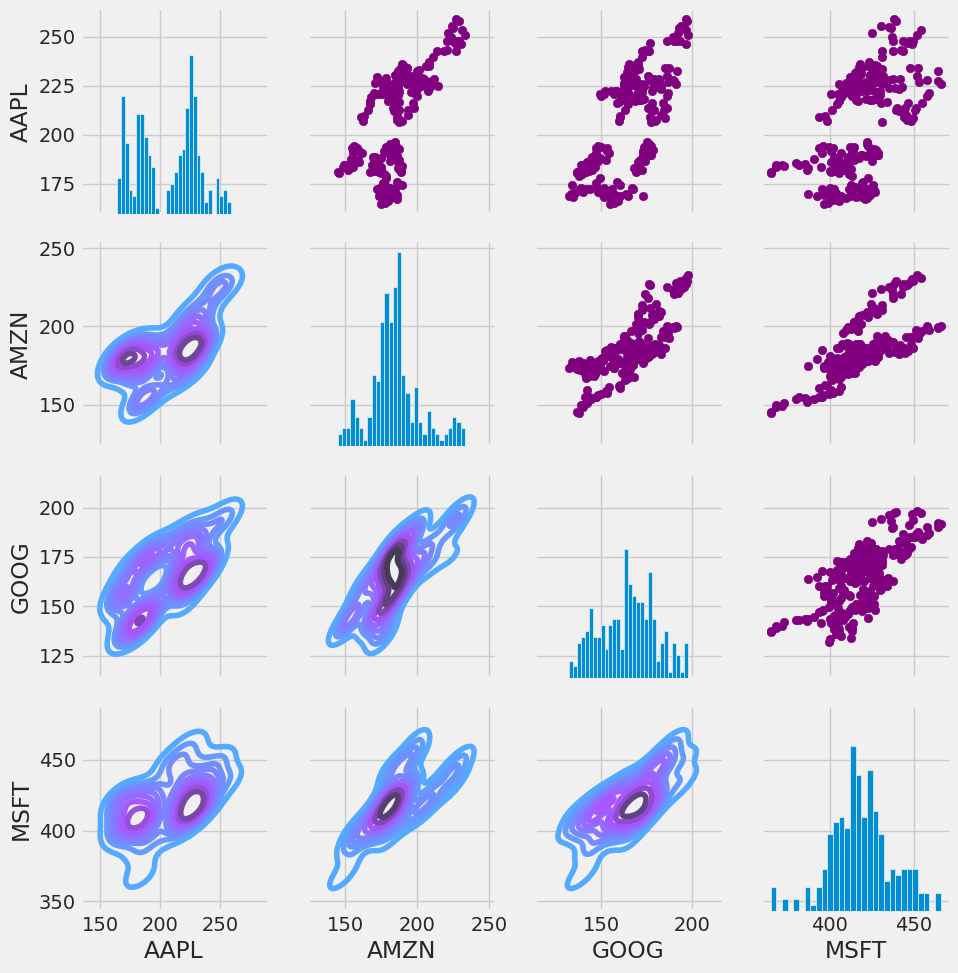

In [43]:
returns_fig = sns.PairGrid(closing_df)
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Microsoft and Apple.

Text(0.5, 1.0, 'Correlation of stock closing price')

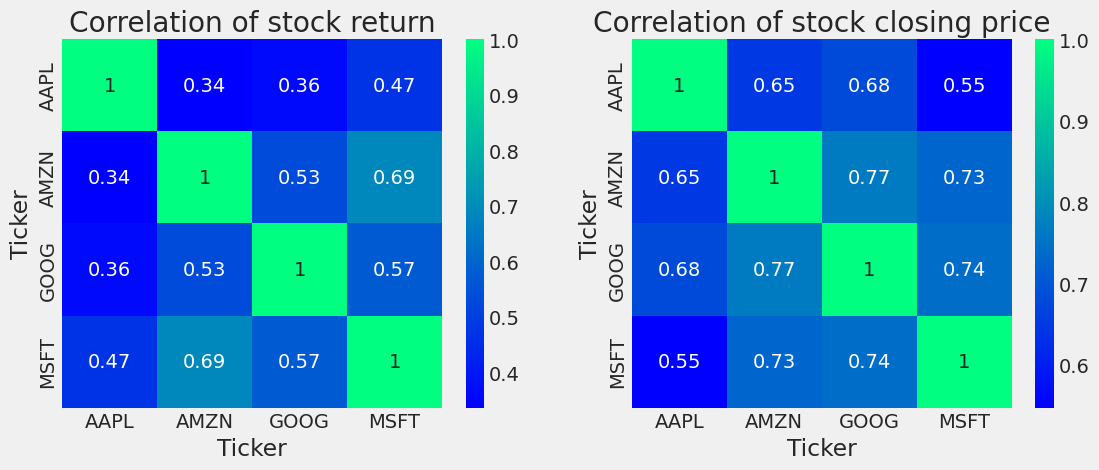

In [42]:
plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='winter')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='winter')
plt.title('Correlation of stock closing price')


# 5. How Much Value do we put at risk by investing in a particular stock

Comparing the expected return with the standard deviation of the daily returns

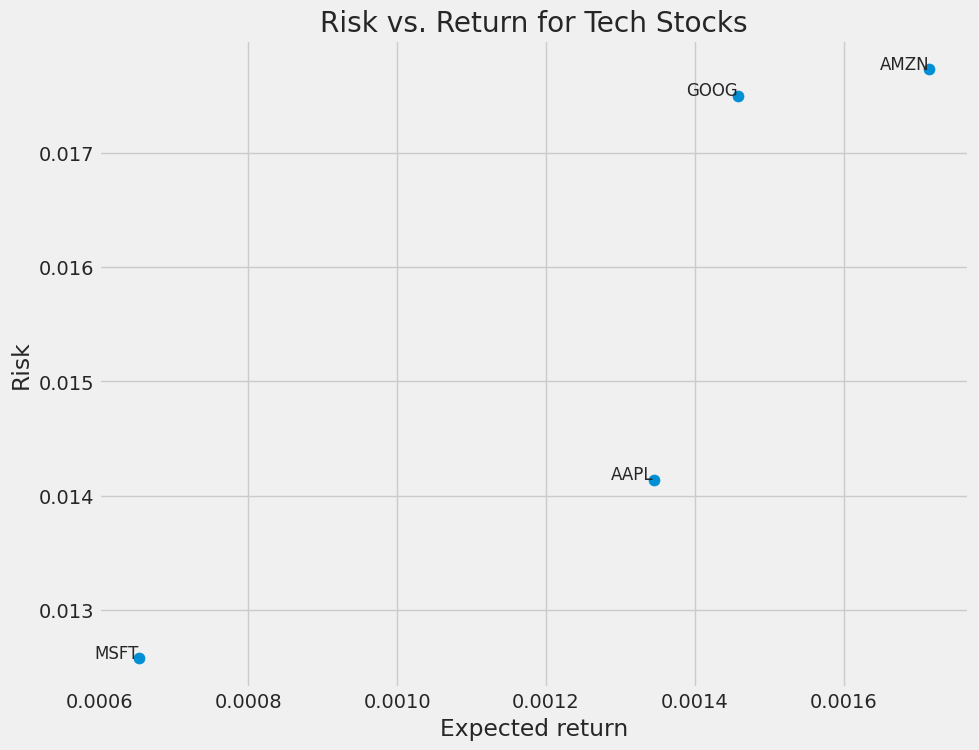

In [23]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for i, name in enumerate(rets.columns):
    plt.text(rets.mean()[i], rets.std()[i], name, fontsize=12, ha='right')

plt.title('Risk vs. Return for Tech Stocks')
plt.grid(True)
plt.show()

# predicting apple stock price

In [8]:
df = yf.download('AAPL', start='2015-01-01', end=datetime.now())

[*********************100%***********************]  1 of 1 completed


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2535 entries, 2015-01-02 to 2025-01-30
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  2535 non-null   float64
 1   (Close, AAPL)      2535 non-null   float64
 2   (High, AAPL)       2535 non-null   float64
 3   (Low, AAPL)        2535 non-null   float64
 4   (Open, AAPL)       2535 non-null   float64
 5   (Volume, AAPL)     2535 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 138.6 KB


In [30]:
df['Close']

Ticker,AAPL
Date,
2015-01-02,27.332500
2015-01-05,26.562500
2015-01-06,26.565001
2015-01-07,26.937500
2015-01-08,27.972500
...,...
2025-01-24,222.779999
2025-01-27,229.860001
2025-01-28,238.259995


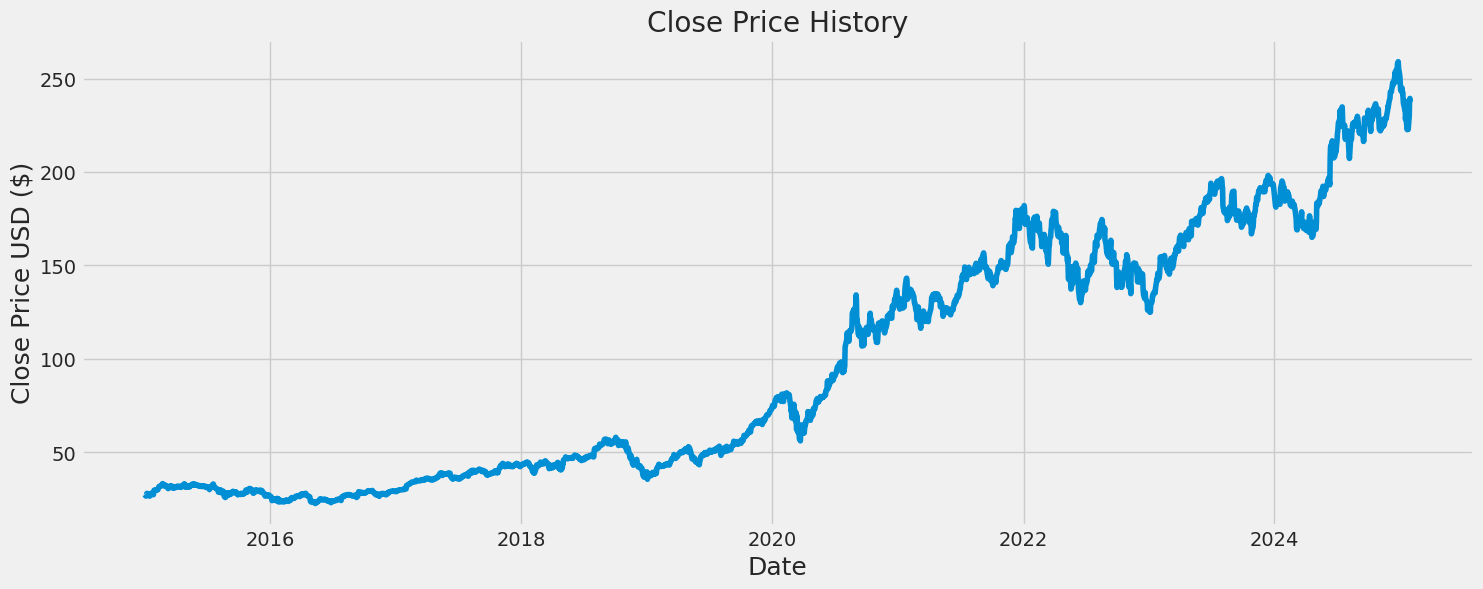

In [31]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()


another 

In [9]:
# Grab the data and this will get returned as as 2d array rows as the first index and columns as the second
data = df['Close']
# Convert the dataframe to a numpy array
dataset = data.values
# get the 95 % of the data as the training data
training_data_len = int(np.ceil(len(dataset) * .95))
training_data_len

2410

In [23]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.02007952],
       [0.01682281],
       [0.01683339],
       ...,
       [0.91684823],
       [0.90936201],
       [0.90263713]])

In [25]:
train_data = scaled_data[:training_data_len, :]
x_train = []
y_train = []


# creating a sliding window 
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

# convert to numpy array since this is necessary before feeding it into deep learning models
x_train, y_train,  = np.array(x_train), np.array(y_train)




# Reshape the data before feeding it into LSTM 
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [36]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train,epochs=20)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


74/74 ━━━━━━━━━━━━━━━━━━━━ 8s 67ms/step - loss: 0.0171
Epoch 2/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - loss: 3.2291e-04
Epoch 3/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - loss: 3.1673e-04
Epoch 4/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - loss: 3.5014e-04
Epoch 5/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - loss: 3.1640e-04
Epoch 6/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - loss: 2.7297e-04
Epoch 7/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - loss: 2.4978e-04
Epoch 8/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - loss: 2.8531e-04
Epoch 9/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - loss: 2.2754e-04
Epoch 10/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - loss: 1.7861e-04
Epoch 11/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - loss: 2.2548e-04
Epoch 12/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - loss: 2.3397e-04
Epoch 13/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - loss: 1.6821e-04
Epoch 14/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - loss: 1.6835e-04
Epoch 15/20
74/74 ━━━━━━━━━━━━

In [37]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 


In [38]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step


4.545402344581826

<ipython-input-39-e3c3bcad8880>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


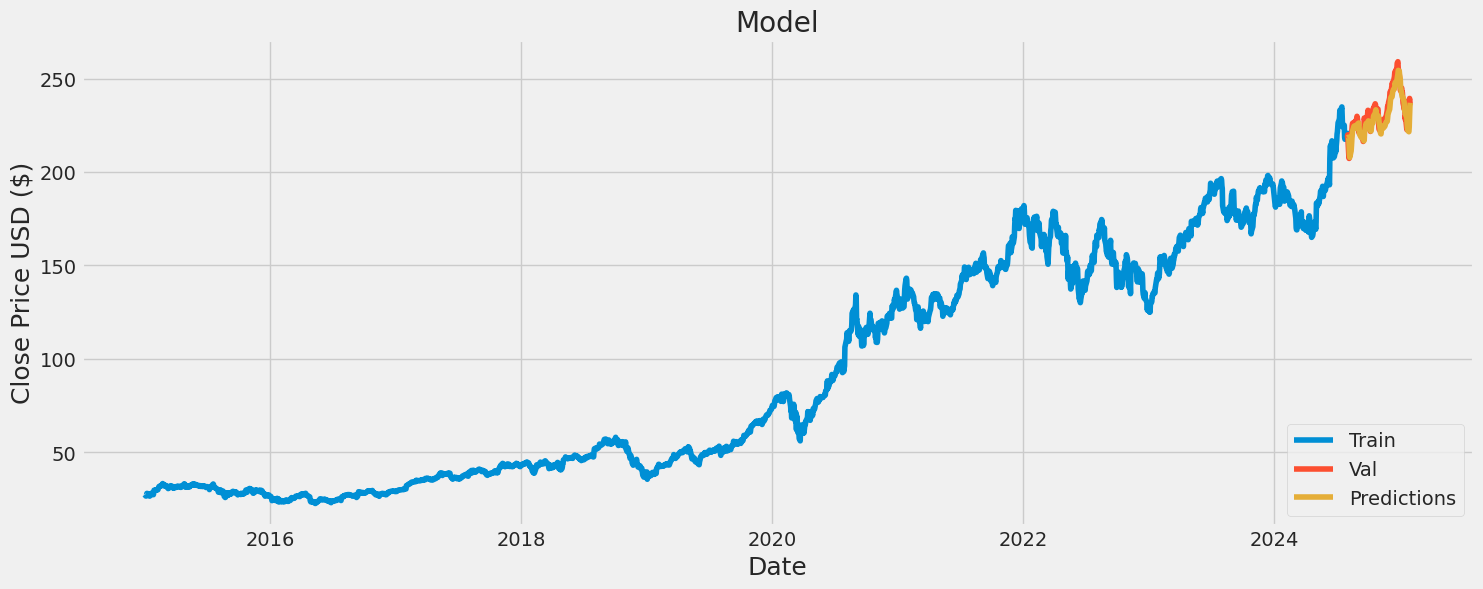

In [39]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train)
plt.plot(valid[['AAPL', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [40]:
valid

Ticker,AAPL,Predictions
Date,,
2024-08-01,218.360001,218.300308
2024-08-02,219.860001,218.417862
2024-08-05,209.270004,218.601822
2024-08-06,207.229996,214.469788
2024-08-07,209.820007,209.843170
...,...,...
2025-01-27,229.860001,221.502396
2025-01-28,238.259995,224.174133
2025-01-29,239.360001,230.076324
